In [44]:
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive   # 코랩 드라이브와 연동
drive.mount('/content/drive')

Mounted at /content/drive


load dataset

In [5]:
data_path = '/content/drive/MyDrive/gachon4-2/deeplearning/week2/Pumpkin_Seeds_Dataset'
df = pd.DataFrame(pd.read_excel(os.path.join(data_path,"Pumpkin_Seeds_Dataset.xlsx")))

In [6]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [8]:
df.keys()

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Major_Axis_Length'}>],
       [<Axes: title={'center': 'Minor_Axis_Length'}>,
        <Axes: title={'center': 'Convex_Area'}>,
        <Axes: title={'center': 'Equiv_Diameter'}>],
       [<Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'Extent'}>],
       [<Axes: title={'center': 'Roundness'}>,
        <Axes: title={'center': 'Aspect_Ration'}>,
        <Axes: title={'center': 'Compactness'}>]], dtype=object)

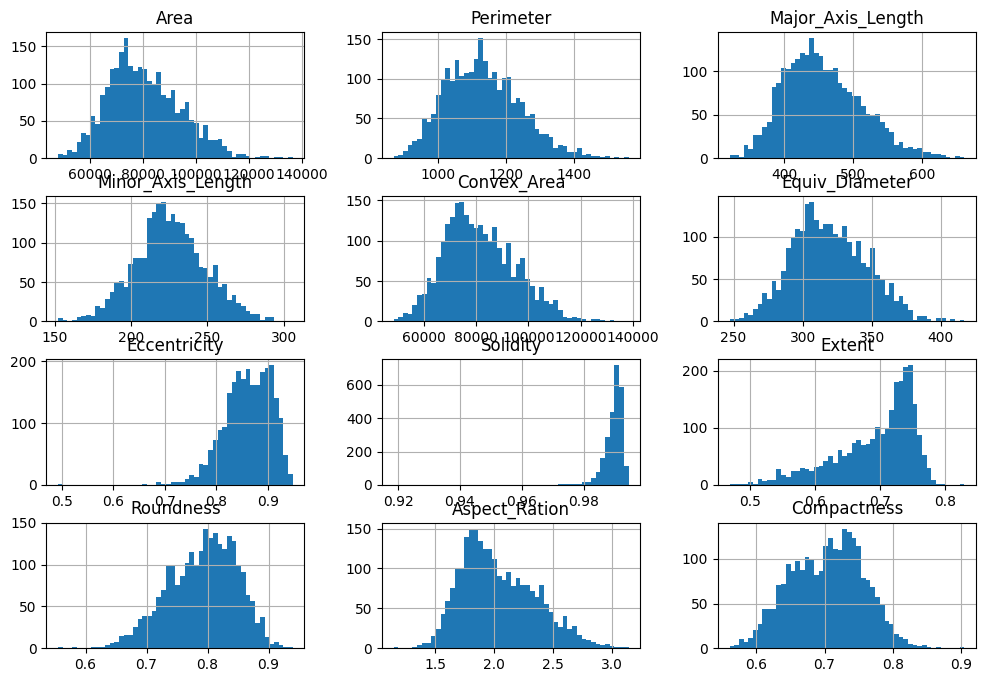

In [62]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(12, 8))

<ipython-input-63-e2c68ab93a61>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="viridis");


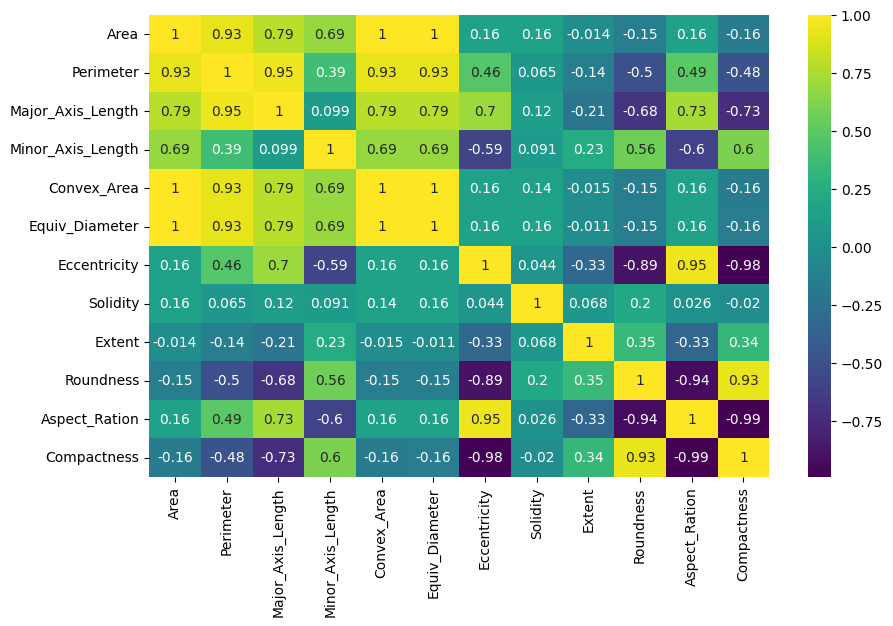

In [63]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="viridis");

In [10]:
# train test split

In [11]:
X = df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness']].values
Y = df['Class'].values

In [12]:
import numpy as np
print("lable class : ", np.unique(Y))

lable class :  ['Çerçevelik' 'Ürgüp Sivrisi']


In [13]:
X = np.array(X)
Y = np.array(Y)

print(X.shape, Y.shape)

(2500, 12) (2500,)


### label to categorical & normalizaton

In [14]:
Y=np.where(Y=='Çerçevelik',0,1) # Çerçevelik:0, Ürgüp Sivrisi:1
print(np.unique(Y))

[0 1]


In [15]:
from keras.utils import to_categorical

Y_onehot = to_categorical(Y)
print(Y_onehot[:5])
print(Y_onehot.shape)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(2500, 2)


In [92]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X)

### build model

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y_onehot, train_size=0.8, random_state=42,shuffle=True)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.85, random_state=42,shuffle=True)

print(x_train.shape, y_train.shape)
# print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(2000, 12) (2000, 2)
(500, 12) (500, 2)


In [94]:
# define model params
input_shape = x_train.shape[1]
output_shape = y_train.shape[1]
nodes = np.ceil(2 * input_shape / 3 + output_shape).astype(int)
batch_size = np.ceil(len(x_train) / 128).astype(int)

In [95]:
print(input_shape, output_shape, nodes, batch_size)

12 2 10 16


In [101]:
from keras.models import *
from keras.layers import *

def DNN(input_size=(12,)):
  inputs=Input(input_size)

  dense1 = Dense(batch_size, activation='relu')(inputs)
  dense2 = Dense(nodes, activation='relu')(dense1)
  drop1 = Dropout(0.5)(dense2)

  outputs = Dense(2, activation='sigmoid')(drop1)
  model = Model(inputs=inputs, outputs=outputs)

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model



In [102]:
DNN_model = DNN()
DNN_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 12)]              0         
                                                                 
 dense_46 (Dense)            (None, 16)                208       
                                                                 
 dense_47 (Dense)            (None, 10)                170       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_48 (Dense)            (None, 2)                 22        
                                                                 
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 모델 컴파일 하기
PATH= "/content/drive/MyDrive/gachon4-2/deeplearning/week2/"
model_checkpoint = ModelCheckpoint(filepath =  os.path.join(PATH,"model.h5"), monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 20)

In [104]:
# 모델 학습
hist = DNN_model.fit(
                  x_train, y_train,                        # 입력 / 라벨
                  epochs = 100, batch_size = 16,            # 학습 회수 / 학습 10번 후 오차 감소
                  validation_data=(x_test, y_test),        # 검증 데이터
                  callbacks = [model_checkpoint, early_stopping], # 저장 및 모니터링
                  shuffle=True
                 )

Epoch 1/100
109/125 [=========================>....] - ETA: 0s - loss: 0.6747 - accuracy: 0.5854
Epoch 1: val_loss improved from inf to 0.62958, saving model to /content/drive/MyDrive/gachon4-2/deeplearning/week2/model.h5
125/125 [==============================] - 2s 7ms/step - loss: 0.6675 - accuracy: 0.6010 - val_loss: 0.6296 - val_accuracy: 0.8200
Epoch 2/100
116/125 [==========================>...] - ETA: 0s - loss: 0.6018 - accuracy: 0.7150
Epoch 2: val_loss improved from 0.62958 to 0.56158, saving model to /content/drive/MyDrive/gachon4-2/deeplearning/week2/model.h5
125/125 [==============================] - 0s 4ms/step - loss: 0.5992 - accuracy: 0.7175 - val_loss: 0.5616 - val_accuracy: 0.8000
Epoch 3/100
118/125 [===========================>..] - ETA: 0s - loss: 0.5432 - accuracy: 0.7648
Epoch 3: val_loss improved from 0.56158 to 0.49491, saving model to /content/drive/MyDrive/gachon4-2/deeplearning/week2/model.h5
125/125 [==============================] - 0s 4ms/step - loss: 0

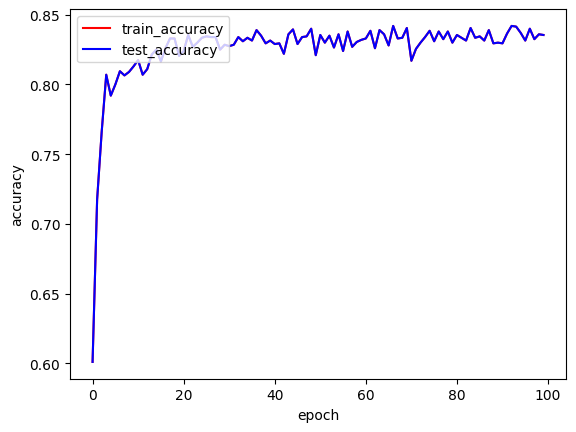

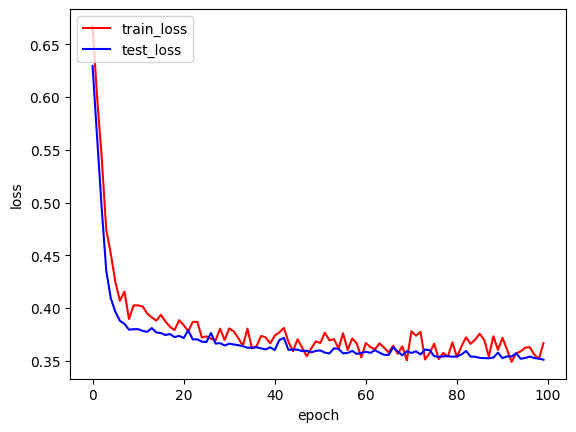

In [105]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], 'r', label = 'train_accuracy')
plt.plot(hist.history['accuracy'], 'b', label = 'test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(hist.history['loss'], 'r', label = 'train_loss')
plt.plot(hist.history['val_loss'], 'b', label = 'test_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [106]:
# 모델 평가
DNN_model.evaluate(x_test, y_test)

# 테스트 데이터 입력하여 예측값 구하기
prediction = DNN_model.predict(x_test)

# 3. perform evaluation on test set
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# evaluation for multi class classification
y_label = np.argmax(y_test,1)
y_pred = np.argmax(prediction,1)

print(classification_report(y_label, y_pred))
print('Accuracy Score:', metrics.accuracy_score(y_label, y_pred))

cm = confusion_matrix(y_label, y_pred)
print(cm)

16/16 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       251
           1       0.88      0.79      0.83       249

    accuracy                           0.84       500
   macro avg       0.85      0.84      0.84       500
weighted avg       0.85      0.84      0.84       500

Accuracy Score: 0.842
[[225  26]
 [ 53 196]]
